# Project Purpose
To make people aware of their likelihood of suffering from a stroke or not in a timely-manner and with reliable results by just providing some information.

## Who benefits from this model/system
Any person who might feel having a stroke incedint might take advatange of this model. As well, it can be used in any hospital during the checkup process. 

# Data Description:
### What is the dataset and how to obtain it
It is a structured (.csv file) stroke dataset that's collected from 43401 patients each with given information about 10 features and their result of whether or not they suffer from a stroke. A stroke is an incident that happens when the brains's blood vessels become narrowed or blocked. subsecuently, the blood cannot travel easily to the brain. Thus, the brain stops functioning due to suffering from stroke and can mostly lead to death.
### Features
* id
- gender
- age
- hypertension
- haert disease
- ever married
- work type
- residence 
- average glucose
- bmi
- smoking status
### Prediction target value
My model will predict whether this entry/case/patient is most likely to be diagnosed with stroke or not. Thus, my model will produce either yes/no , 0/1 classes which is a classification problem.
### Data link
Data can be found through this link: [dataset link](https://www.kaggle.com/lirilkumaramal/heart-stroke)

# Project objectives:
This project is required to deliver at least the following to reach the desired goal and produce decent results:
1. **Data preprocessing**
    * deal with missing values
    * deal with redunduncy
    * deal with outliers
    * One-hot encoding (same as label encoder, but with order between values)
    * dummy variables
    * standarization
    

2. **Exploratory Data Analysis (EDA)**
    * understand the relationship between features by plotting some plots
    * understand the relationship between features and the target by plotting some plots
    * visualize the counts for some features 
    * visualize the percentages of the target classes before and after oversampling
    * visualize box plots
    * Data distribution
    
3. **Machine Learning algorithms (classifiers)**
    * Random Forest 
    * Logistic regression
    
4. **Data resampling techniques**
    * Oversampling SMOTE technique
    
5. **Results & comparison**
    * Accuracy
    * precession
    * recall
    * confusion matrix
    * AUC 
    
6. **Tools**
    * Pandas
    * ~~numpy~~
    * matplotlib
    * seaborn
    * sklearn


# Imports

In [124]:
#import the propable needed libraries

#data preprocessing libraries
import pandas as pd
import numpy as np

#EDA libraries
import seaborn as sns
import matplotlib.pyplot as plt
# You can configure the format of the images: ‘png’, ‘retina’, ‘jpeg’, ‘svg’, ‘pdf’.
%config InlineBackend.figure_format = 'svg'
# this statement allows the visuals to render within your Jupyter Notebook
%matplotlib inline

# for data split 
from sklearn.model_selection import train_test_split

# for data standarization
from sklearn.preprocessing import StandardScaler

#important metrics
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

#for building classifiers 
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Data preprocessing & EDA

lets start by reading and viewing the important information of the data using Pandas library

In [126]:
#download the Stroke data 43400+ instances
stroke_data=pd.read_csv(r'C:\Users\Manar\Desktop\SDAIA(twaiq)\project\dataset\train_strokes.csv')

In [127]:
#print data info
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


From the above the info we can observe that there are some **missing values** which specifically reside in **'bmi'** and **'smoking_status'** columns.
Now lets make sure of that claim by using **isnull()** function below.

In [128]:
#what is the number of null values in each column
stroke_data.isnull().sum(axis=0)

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

It appears that **bmi** and **smoking_status** indeed have missing values.
Now lets plot this info so we can clearly see it visually

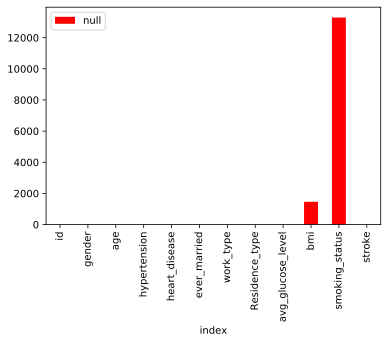

In [129]:
#visiualize the missing values per column
stroke_data.isnull().sum().reset_index(name="null").plot.bar(x='index', y='null', rot=90, color='red');

# Handle missing values in both categorical and numerical features

To handle the missing values we can use one out of three solution startegies:
* deletion
* impute using [mean, median, mode]
* impute by building a model to predict their values
since the deletion strategy will lead to a data loss, we will ignore it as it will also lead to poor observations and results. On the other hand, we will also ignore building a model that is only used to predict the missing values as it can be somehow time-cosuming. However, using the statistical metrics such as mean, median and mode can achieve decent results will less effort and time-consumed.

**numerical feature:**
* mean
* median

**categorical feature:**
* mode

since there are 2 possible options to impute the missing values in numerical features, i will visualize the distribution of the data that reside in **bmi** feature.

**data distribution**
* normal? use the **mean**
* skewed? use the **median**

And that is because the **median** is more resistant to outliers and less affected by them unlike the **mean**  

C:\Users\Manar\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Manar\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Manar\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


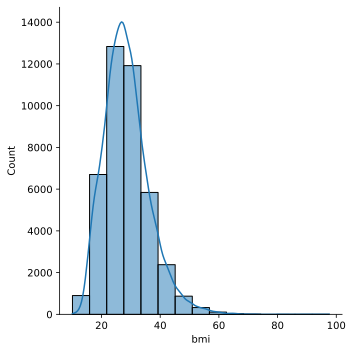

In [136]:
#missing problem > data distribution > mean or median?
#stroke_data.plot.hist(bins=12,alpha=0.5);
sns.displot(stroke_data['bmi'], bins= 15, kde=True);

Since the data tend to be skewed, i will then use the median to impute the missing values with

In [139]:
#missing data imputation
bmi_median = stroke_data['bmi'].median()
stroke_data['bmi'].fillna(value=bmi_median, inplace=True)
bmi_median

27.7

In [140]:
stroke_data[stroke_data['bmi'].isnull()]#no records with empty bmi

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Now, i will impute the missing values in the categorical feature **smoking_status** with the mode

In [141]:
smoking_mode=stroke_data['smoking_status'].mode()
smoking_mode

0    never smoked
dtype: object

Visualize the mode of the **smoking_status** feature

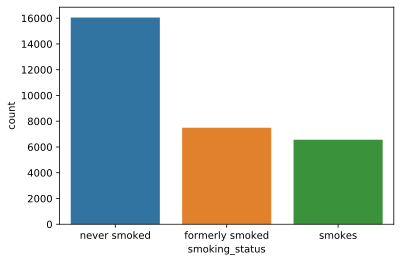

In [142]:
sns.countplot(x='smoking_status', data= stroke_data);

Apparently, the most frequent value is **'never smoked'** and thus i will be imputing the missing values with it

In [143]:
#missing data imputation
stroke_data['smoking_status']=stroke_data['smoking_status'].fillna(stroke_data['smoking_status'].value_counts().index[0])
stroke_data['smoking_status']

0           never smoked
1           never smoked
2           never smoked
3        formerly smoked
4           never smoked
              ...       
43395       never smoked
43396    formerly smoked
43397    formerly smoked
43398       never smoked
43399       never smoked
Name: smoking_status, Length: 43400, dtype: object

In [144]:
stroke_data[stroke_data['smoking_status'].isnull()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


Now, lets make sure that the updated data isn't suffering from missing values after imputations by making a plot. 

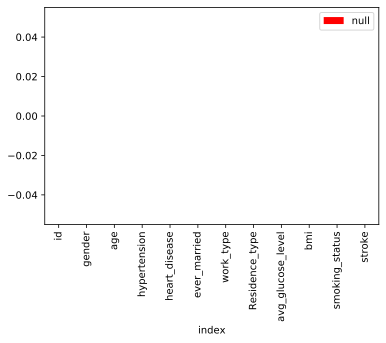

In [145]:
#visiualize the missing values per column
stroke_data.isnull().sum().reset_index(name="null").plot.bar(x='index', y='null', rot=90, color='red');
#no column has missing values

In [146]:
#print some stat
stroke_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000,43400.000000
mean,36326.142350,42.217894,0.093571,0.047512,104.482750,28.574551,0.018041
std,21072.134879,22.519649,0.291235,0.212733,43.111751,7.639769,0.133103
min,1.000000,0.080000,0.000000,0.000000,55.000000,10.100000,0.000000
25%,18038.500000,24.000000,0.000000,0.000000,77.540000,23.400000,0.000000
50%,36351.500000,44.000000,0.000000,0.000000,91.580000,27.700000,0.000000
75%,54514.250000,60.000000,0.000000,0.000000,112.070000,32.600000,0.000000
max,72943.000000,82.000000,1.000000,1.000000,291.050000,97.600000,1.000000


In [147]:
#print some random instances
stroke_data.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
19358,45496,Female,27.0,0,0,Yes,Private,Rural,111.13,20.3,never smoked,0
39921,23980,Male,63.0,0,0,Yes,Private,Urban,81.11,27.0,formerly smoked,0
40932,4531,Female,36.0,0,0,Yes,Govt_job,Urban,83.51,29.7,never smoked,0
24818,61753,Female,62.0,1,0,Yes,Private,Rural,200.42,46.8,formerly smoked,0
15058,51516,Female,42.0,0,0,Yes,Private,Urban,86.83,40.4,smokes,0
12913,26022,Female,14.0,0,0,No,Never_worked,Rural,88.34,29.7,formerly smoked,0
37076,9173,Female,53.0,1,0,Yes,Govt_job,Rural,69.61,24.9,smokes,0
28369,35929,Female,51.0,0,0,Yes,Private,Urban,83.32,30.4,formerly smoked,0
27365,46977,Male,17.0,0,0,No,Private,Rural,99.56,26.0,never smoked,0
35764,41189,Female,49.0,0,0,Yes,Private,Urban,98.39,30.6,smokes,0


# Observations
As we can observe from the above random data sample that the data suffers from many issues that need to be further preprocessed such as:
* columns with **no importance** toward the problem [id]
* features with **categorical** values [gender, work_type, residence_type, smoking_status] 

the features with categorical values can be transformed to numerical by either:
* One-hot encoding [**binary** values and **order** does not matter]
* Label encoding [**binary or multi-valued** values and **order** does matter]
* Replacement with **dummy variables**

In [148]:
#delete any unecessary columns [id]
stroke_data.drop(['id'],axis='columns',inplace=True)
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0


Since the **age** feature is mostly dealt with as an **integer** than float, i will also consider any float age to integer age

In [149]:
#is there any floating age?
stroke_data[stroke_data['age']==float]
#no floating value

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


I will use **LabelEncoder** since it is easier to me and  the feature is binary and the thus the order will have no effect in process

In [151]:
#change the gender column into 0FEMALE,1MALE
from sklearn.preprocessing import LabelEncoder
le_gender=LabelEncoder()
stroke_data['gender_encoded']=le_gender.fit_transform(stroke_data['gender']) #1=male,#0=female
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,1
1,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1
2,Female,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,0
3,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0
4,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,Female,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,0
43396,Female,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,0
43397,Female,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,0
43398,Male,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,1


Since i have added an **encoded feature**, i have to **delete** the old gender feature to avoid **redundency** = **two or more features giving the same information**

In [152]:
#now drop the gender column
stroke_data.drop(['gender'],axis='columns',inplace=True)
stroke_data

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded
0,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,1
1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1
2,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,0
3,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0
4,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,1
...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,0
43396,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,0
43397,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,0
43398,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,1


Lets print the **total number** of each value in the **gender_encoded**

In [179]:
stroke_data.gender_encoded.value_counts()

0    25665
1    17724
2       11
Name: gender_encoded, dtype: int64

Since there are no **3 genders** as well as **the third** one has a **very few instances**, hence, it will be **dropped**

In [180]:
#drop gender code 2 since it has very few values
stroke_data.drop(stroke_data.loc[stroke_data['gender_encoded']==2].index,inplace=True)

I will do the same LabelEncoder method with the **'ever_married_encoded'**

In [153]:
#change the yes/no column to 0NO,1YES
le_married=LabelEncoder()
stroke_data['ever_married_encoded']=le_gender.fit_transform(stroke_data['ever_married']) #1=married,#0=not married
stroke_data

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded
0,3.0,0,0,No,children,Rural,95.12,18.0,never smoked,0,1,0
1,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0,1,1
2,8.0,0,0,No,Private,Urban,110.89,17.6,never smoked,0,0,0
3,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0,0,1
4,14.0,0,0,No,Never_worked,Rural,161.28,19.1,never smoked,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,No,children,Urban,58.64,20.4,never smoked,0,0,0
43396,56.0,0,0,Yes,Govt_job,Urban,213.61,55.4,formerly smoked,0,0,1
43397,82.0,1,0,Yes,Private,Urban,91.94,28.9,formerly smoked,0,0,1
43398,40.0,0,0,Yes,Private,Urban,99.16,33.2,never smoked,0,1,1


In [154]:
#delete the ever_married column
stroke_data.drop(['ever_married'],axis='columns',inplace=True)
stroke_data

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded
0,3.0,0,0,children,Rural,95.12,18.0,never smoked,0,1,0
1,58.0,1,0,Private,Urban,87.96,39.2,never smoked,0,1,1
2,8.0,0,0,Private,Urban,110.89,17.6,never smoked,0,0,0
3,70.0,0,0,Private,Rural,69.04,35.9,formerly smoked,0,0,1
4,14.0,0,0,Never_worked,Rural,161.28,19.1,never smoked,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
43395,10.0,0,0,children,Urban,58.64,20.4,never smoked,0,0,0
43396,56.0,0,0,Govt_job,Urban,213.61,55.4,formerly smoked,0,0,1
43397,82.0,1,0,Private,Urban,91.94,28.9,formerly smoked,0,0,1
43398,40.0,0,0,Private,Urban,99.16,33.2,never smoked,0,1,1


Now, lets check for any **redundent** entry/row. If there is such an entry/row it will be **deleted** since it increases the complexity with benefit. 

In [157]:
#check for redundant rows
stroke_data[stroke_data.duplicated()]

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded


That's great, my data doesn't suffer from redundent rows and thus i will not suffer from data loss. Now, since our **ML algorithms** only deals with **numerics**, i still have to tranform the values of the remaining features that have categorical values. Here, i will be using the **dummy variables** strategy to solve this problem.

In [160]:
#convert all variable to numerical variables
work_dummies = pd.get_dummies(stroke_data.work_type)
work_dummies.head()
#dummy variable trap 

,Govt_job,Never_worked,Private,Self-employed,children
0,0,0,0,0,1
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,1,0,0,0


In [161]:
res_dummies = pd.get_dummies(stroke_data.Residence_type)
res_dummies.head()

,Rural,Urban
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0


In [162]:
smok_dummies = pd.get_dummies(stroke_data.smoking_status)
smok_dummies.head()

,formerly smoked,never smoked,smokes
0,0,1,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0


In [163]:
df_with_dummies = pd.concat([stroke_data,work_dummies],axis='columns')
df_with_dummies.head()

,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children
0,3.0,0,0,children,Rural,95.12,18.0,never smoked,0,1,0,0,0,0,0,1
1,58.0,1,0,Private,Urban,87.96,39.2,never smoked,0,1,1,0,0,1,0,0
2,8.0,0,0,Private,Urban,110.89,17.6,never smoked,0,0,0,0,0,1,0,0
3,70.0,0,0,Private,Rural,69.04,35.9,formerly smoked,0,0,1,0,0,1,0,0
4,14.0,0,0,Never_worked,Rural,161.28,19.1,never smoked,0,1,0,0,1,0,0,0


In [164]:
df_with_dummies.drop('work_type',axis='columns',inplace=True)
df_with_dummies.head()

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children
0,3.0,0,0,Rural,95.12,18.0,never smoked,0,1,0,0,0,0,0,1
1,58.0,1,0,Urban,87.96,39.2,never smoked,0,1,1,0,0,1,0,0
2,8.0,0,0,Urban,110.89,17.6,never smoked,0,0,0,0,0,1,0,0
3,70.0,0,0,Rural,69.04,35.9,formerly smoked,0,0,1,0,0,1,0,0
4,14.0,0,0,Rural,161.28,19.1,never smoked,0,1,0,0,1,0,0,0


In [165]:
df_with_dummies = pd.concat([df_with_dummies,res_dummies],axis='columns')
df_with_dummies.head()

,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban
0,3.0,0,0,Rural,95.12,18.0,never smoked,0,1,0,0,0,0,0,1,1,0
1,58.0,1,0,Urban,87.96,39.2,never smoked,0,1,1,0,0,1,0,0,0,1
2,8.0,0,0,Urban,110.89,17.6,never smoked,0,0,0,0,0,1,0,0,0,1
3,70.0,0,0,Rural,69.04,35.9,formerly smoked,0,0,1,0,0,1,0,0,1,0
4,14.0,0,0,Rural,161.28,19.1,never smoked,0,1,0,0,1,0,0,0,1,0


In [166]:
df_with_dummies.drop('Residence_type',axis='columns',inplace=True)
df_with_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban
0,3.0,0,0,95.12,18.0,never smoked,0,1,0,0,0,0,0,1,1,0
1,58.0,1,0,87.96,39.2,never smoked,0,1,1,0,0,1,0,0,0,1
2,8.0,0,0,110.89,17.6,never smoked,0,0,0,0,0,1,0,0,0,1
3,70.0,0,0,69.04,35.9,formerly smoked,0,0,1,0,0,1,0,0,1,0
4,14.0,0,0,161.28,19.1,never smoked,0,1,0,0,1,0,0,0,1,0


In [167]:
df_with_dummies = pd.concat([df_with_dummies,smok_dummies],axis='columns')
df_with_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
0,3.0,0,0,95.12,18.0,never smoked,0,1,0,0,0,0,0,1,1,0,0,1,0
1,58.0,1,0,87.96,39.2,never smoked,0,1,1,0,0,1,0,0,0,1,0,1,0
2,8.0,0,0,110.89,17.6,never smoked,0,0,0,0,0,1,0,0,0,1,0,1,0
3,70.0,0,0,69.04,35.9,formerly smoked,0,0,1,0,0,1,0,0,1,0,1,0,0
4,14.0,0,0,161.28,19.1,never smoked,0,1,0,0,1,0,0,0,1,0,0,1,0


In [168]:
df_with_dummies.drop('smoking_status',axis='columns',inplace=True)
df_with_dummies.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
0,3.0,0,0,95.12,18.0,0,1,0,0,0,0,0,1,1,0,0,1,0
1,58.0,1,0,87.96,39.2,0,1,1,0,0,1,0,0,0,1,0,1,0
2,8.0,0,0,110.89,17.6,0,0,0,0,0,1,0,0,0,1,0,1,0
3,70.0,0,0,69.04,35.9,0,0,1,0,0,1,0,0,1,0,1,0,0
4,14.0,0,0,161.28,19.1,0,1,0,0,1,0,0,0,1,0,0,1,0


Currently, we have **solved most of the issues** that reside in the data. Such as, dealing with **missing,redundent and inconsistent values** and **categorical and unimportant variables**. Hence, we are almost finished with the data **preprocessing** part.
Afterwards, I will print some random sample from the preprocessed data to ensure that it's updated and doesn't suffer from the mentioned issues.

In [169]:
#positive cases
#stroke_data[stroke_data.stroke==1].head(10)
df_with_dummies[df_with_dummies.stroke==1].head(10)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
63,67.0,0,1,228.69,36.6,1,1,1,0,0,1,0,0,0,1,1,0,0
81,61.0,0,0,202.21,27.7,1,0,1,0,0,0,1,0,1,0,0,1,0
141,80.0,0,1,105.92,32.5,1,1,1,0,0,1,0,0,1,0,0,1,0
257,49.0,0,0,171.23,34.4,1,0,1,0,0,1,0,0,0,1,0,0,1
264,79.0,1,0,174.12,24.0,1,0,1,0,0,0,1,0,1,0,0,1,0
288,81.0,0,0,186.21,29.0,1,1,1,0,0,1,0,0,0,1,1,0,0
291,74.0,1,1,70.09,27.4,1,1,1,0,0,1,0,0,1,0,0,1,0
320,69.0,0,0,94.39,22.8,1,0,0,0,0,1,0,0,0,1,0,1,0
407,59.0,0,0,76.15,27.7,1,0,1,0,0,1,0,0,1,0,0,1,0
426,78.0,0,0,58.57,24.2,1,0,1,0,0,1,0,0,0,1,0,1,0


Since there is no categorical value, we **are all set** to build a classifier and feed it with this preprocessed data

In [35]:
#now we totally have no qualitative data, instead we only have numerics

# Examining the features and target

* lets have an info about the age feature. Such as most/less frequent age occurances  

C:\Users\Manar\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\Manar\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\Manar\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


<Figure size 864x360 with 0 Axes>

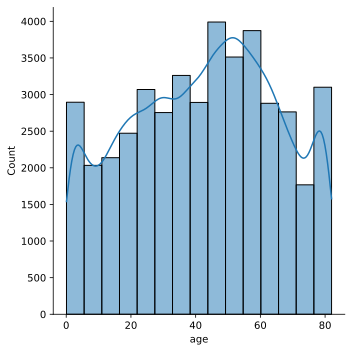

In [172]:
#visualize the distribution of the patients' ages
plt.figure(figsize=(12,5));
sns.displot(df_with_dummies['age'], bins=15, kde=True);

we can easily observe from the above visual that the **most frequent** age resides between 40-60 and the **least frequent** resides between 60-80

In [ ]:
#it takes forever to run, so for now i will settle for heatmap. 
#sns.pairplot(df_with_dummies);

lets have an info about the work_type feature. Such as most/less frequent work_type occurances

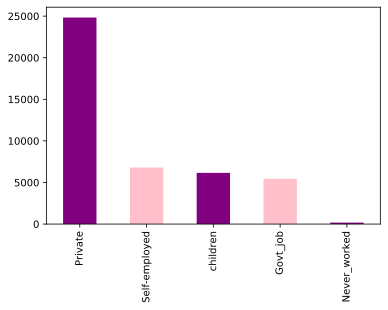

In [37]:
stroke_data['work_type'].value_counts().plot.bar(x='index',y='v',color=['purple','pink']);

we can easily observe from the above visual that the **most frequent** work_type is **private** and the **least frequent** is **never_worked**

Now, lets notice the stroke and non-stroke occurncese per work_type

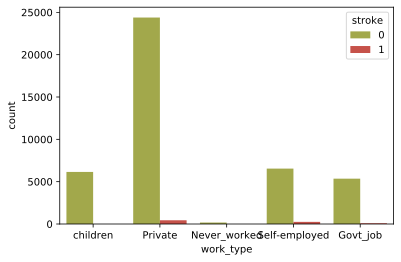

In [175]:
sns.countplot(x='work_type',data=stroke_data,hue='stroke',palette=['#AFB83B','#DB4035']);

We can observe from the above figure that the work_type is kinda biased toward the non-stroke class. This observation can actually give us some insight about the quality of our data with regard to Bias problem. therefore, lets test another feature and check whether it has the same issue or not.

In [176]:
stroke_data['Residence_type'].value_counts()

Urban    21756
Rural    21644
Name: Residence_type, dtype: int64

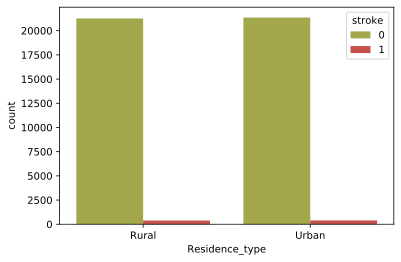

In [177]:
#i actually can delete this column, since it does not have that much effect on the target class
sns.countplot(x='Residence_type',data=stroke_data,hue='stroke',palette=['#AFB83B','#DB4035']);

the bias problem encountered again in different feature. this implies that our data suffers from the imbalance issue with a high confidence rate which justifies the obvious bias 

People who live in rural are **roughly equal** to the number of people who live in urban **across all work types**

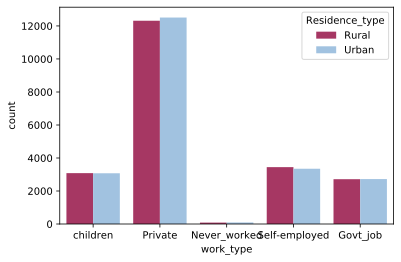

In [182]:
sns.countplot(x='work_type',data=stroke_data,hue='Residence_type',palette=['#B8255F','#96C3EB']);

Now, lets determine the **relationship** between features within themselves and with the target. for that, we will use Heatmap.

# Features and target relationships
Our main goal here is to have the **lowest** relationship **between features within themselves** and the **highest** relationship between **features with the target**. As high/strong realtionship between features implies that they are **redundent** and adding complexity with no benefit.

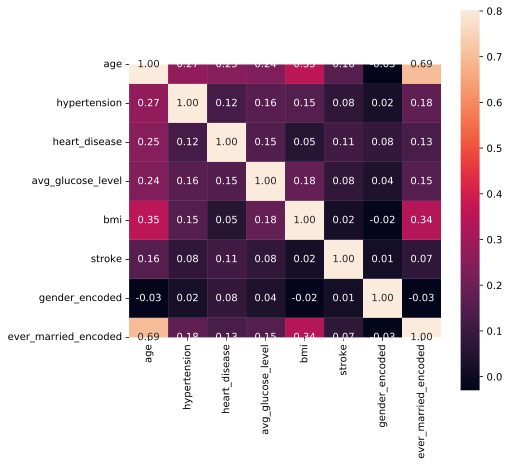

In [49]:
#correlation
correlation=stroke_data.corr()
fig,axes=plt.subplots(figsize=(7,7))
sns.heatmap(correlation,vmax=.8,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':10});

This heatmap shows that there's **no highly correlated** relationship **feature with the target**, but somehow the age contributes more to that relationship compared to the other features. Also, we can observe that there's **no highly correlated** relationship within the **features with themselves** except **[age, ever_married_encoded]** to a decent extent.

Now, lets examine the values distribution of the age feature against the smoke_status and their stroke incident. To do so, lets make a Boxplot so we can observe the **min,max 25th percentile,mean,75th percentile and the whiskers**. The whiskers are basically used to **determine the outliers**.

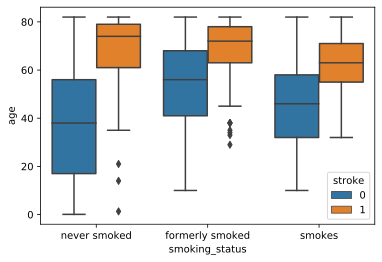

In [183]:
#plt.figure(figsize=(12,5))
sns.boxplot(y='age', x='smoking_status',hue='stroke' ,data=stroke_data);

Since it is obvious from the above figure that our data suffer from outliers, hence, i will make some conditions to remove them

In [184]:
#detect and remove outliers from above chart
stroke_data.drop(stroke_data[(stroke_data['age']<50) & (stroke_data['smoking_status']=='formerly smoked') & (stroke_data['stroke']==1)].index,inplace=True)
stroke_data.drop(stroke_data[(stroke_data['age']<40) & (stroke_data['smoking_status']=='never smoked') & (stroke_data['stroke']==1)].index,inplace=True)

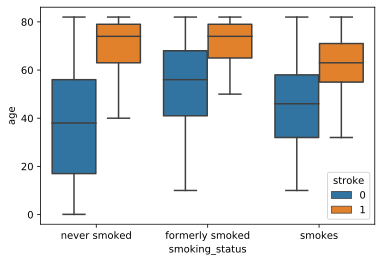

In [185]:
#check for outliers again
sns.boxplot(y='age', x='smoking_status',hue='stroke' ,data=stroke_data);
#that's great no outliers

# Target classes counts

In [186]:
stroke_data['stroke'].value_counts()

0    42606
1      758
Name: stroke, dtype: int64

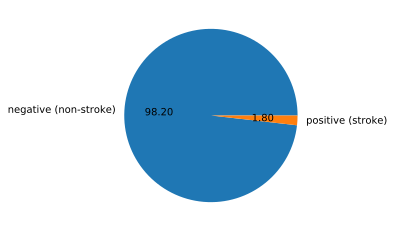

In [187]:
#sns.countplot(x='stroke', data=stroke_data);
plt.pie([42617,783],labels=['negative (non-stroke)','positive (stroke)'],autopct='%.2f');

As we can observe from the above figure and values that our dataset suffers from **imbalance** issue as we have majority and minority classes. This will definitely result in a great **Bias** toward the majority class and thus will lead to **unreliable** results and hence **poor** conclusions

In [53]:
#use sampling methods to overcome the imbalance issue

#most propably will use oversampling 
#=upsampling=make the minorty class's instances 
#equal to the majority's class instances
#to have larger data not smaller.

# Training models

**classification models goals:**
* Choose two main ML algorithm that is suitable for structured data
* Build and train the two models before tackling the problem of **imbalance data issue**
* Tackle the imabalance data issue by Oversampling SMOTE method
* Build and train the two models after tackling the problem of **imbalance data**

### Without resampling techniques 

In order to build a model, we need to conduct sequential steps as follows:
1. Seperate the features from the target variable that are in the main preprocessed dataset
2. Split the dataset into training set and testing set "each has its own X's = set of features and has its own y's = corresponding target values"
3. train on training set
4. predict on testing set
5. use matrics to produce results



In [203]:
#test firstly without resampling techniques and then resampling and compare

#seperate the target from the features
X=df_with_dummies.drop('stroke',axis='columns')#features_without_os
y=df_with_dummies['stroke']#target_without_os

#split the data into training and testing sets and organize it
#y's = target variable's values in both the training split or the testing split
#X's = features variables' values in both the training split and testing split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0)#the results will not fluctuates

In [205]:
X_train

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_encoded,ever_married_encoded,Govt_job,Never_worked,Private,Self-employed,children,Rural,Urban,formerly smoked,never smoked,smokes
19810,45.0,0,0,80.68,22.1,0,1,0,0,1,0,0,1,0,0,0,1
5874,23.0,0,0,90.32,36.4,1,0,0,0,1,0,0,0,1,0,0,1
32313,32.0,0,0,90.50,37.1,1,1,0,0,1,0,0,0,1,0,1,0
27810,8.0,0,0,63.77,18.8,0,0,0,0,0,0,1,1,0,0,1,0
40414,63.0,0,0,90.01,31.4,0,1,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32103,60.0,0,0,89.98,24.1,0,1,0,0,1,0,0,0,1,0,1,0
30403,75.0,1,0,80.89,30.4,0,1,0,0,1,0,0,0,1,1,0,0
21243,82.0,0,0,59.23,23.7,0,1,0,0,1,0,0,0,1,1,0,0
42613,55.0,0,0,103.00,37.6,1,1,0,0,1,0,0,0,1,0,1,0


lets make sure that all the splits are of equal size within a set (i.e, either training or testing).
* x_train length = y_train length
* x_test length = y_test length

In [206]:
X_org_length=len(X)
y_org_length=len(y)
X_train_length=len(X_train)
y_train_length=len(y_train)
X_test_length=len(X_test)
y_test_length=len(y_test)
lengths={'X_org_length':X_org_length,'y_org_length':y_org_length,'X_train_length':X_train_length,'y_train_length':y_train_length,'X_test_length':X_test_length,'y_test_length':y_test_length}
lengths_df=pd.DataFrame(lengths, index=[0]) # If using all scalar values, you must pass an index
lengths_df

,X_org_length,y_org_length,X_train_length,y_train_length,X_test_length,y_test_length
0,43400,43400,30380,30380,13020,13020


We can be assured from the dataframe above that the features instances and traget instances within training or testing set are compatible

### standarization
Now in order to deal with any ML classifier in general and logestic regression in specific, it is better to standarize data and let them lie between a common range and not randomly fluctuating 
standarize = making some tranformation on the data so that their values lie between [0-1]

In [207]:
#to overcome the problem of 
#ConvergenceWarning: lbfgs failed to converge (status=1):
#STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.
#Increase the number of iterations (max_iter) or scale the data as shown in:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [208]:
X_train

array([[ 0.12608606, -0.32305703, -0.22159784, ..., -0.45754427,
        -1.44695762,  2.37924778],
       [-0.84915709, -0.32305703, -0.22159784, ..., -0.45754427,
        -1.44695762,  2.37924778],
       [-0.45019398, -0.32305703, -0.22159784, ..., -0.45754427,
         0.69110524, -0.42030091],
       ...,
       [ 1.76626771, -0.32305703, -0.22159784, ...,  2.18558085,
        -1.44695762, -0.42030091],
       [ 0.5693784 , -0.32305703, -0.22159784, ..., -0.45754427,
         0.69110524, -0.42030091],
       [ 1.36730461,  3.0954287 ,  4.51267943, ...,  2.18558085,
        -1.44695762, -0.42030091]])

Finally, now we can **build a classifier** and feed it the training set then test it on the testing set

### Random forest model 1

In [209]:
#build the classifier
model_rf_no =  RandomForestClassifier()
model_rf_no.fit(X_train, y_train)#train the model on the trainig set that consists of features and their correspoding target values
y_pred1 = model.predict(X_test)#now test the already-trained model on the testing set and save its predictions

### Matrics on model 1

In [211]:
precision = precision_score(y_test, y_pred1)
roc = roc_auc_score(y_test, y_pred1)
recall = recall_score(y_test, y_pred1)
accuracy=accuracy_score(y_test,y_pred1)
data={'accuracy':accuracy,'precesion':precision,'recall':recall}
matrics_df=pd.DataFrame(data, index=[0])
matrics_df

,accuracy,precesion,recall
0,0.982796,0.0,0.0


Notice the very high accuracy with straight zeros in the precesion and recall. this implies the following:
1. accuracy is highly affected by the imbalance issue 
2. accuarcy is a very deceptive and irreliable metric when having an imbalance data issue
3. precesion and recall are the metrics to go for when having an imbalanced data issue

In [219]:
print(sum(y_test==1))
print(sum(y_test==0))

221
12799


### Confusion matrix, model 1

In [212]:
cm= confusion_matrix(y_test,y_pred)
cm
#TN #FP
#FN #TP

array([[12796,     3],
       [  221,     0]], dtype=int64)

we can observe from the above 2 info that the test data originally has 12799 non-stroke instances where it has 221 for stroke instances. After testing the trained model on the testing data it did not classify any stroke instance correctly instead it considered and predicted them as non-stroke cases which so naive and irreliable. however, it correctly classified all the non-stroke instances except for 3 which is expected since the is an imbalanced data and is biased toward the negative class. 

Text(33.0, 0.5, 'True')

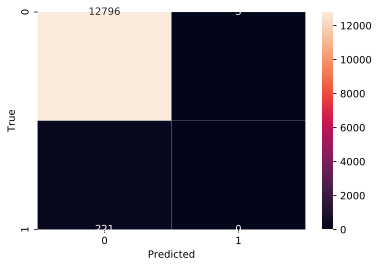

In [220]:
#visualizing the confusion matrix
sns.heatmap(cm, annot=True, fmt='d');
plt.xlabel('Predicted')
plt.ylabel('True')

### Logestic regression model 1

In [222]:
#build the classifier
#logistic regression insists to standarize data in order to build the classifier unlike random forest.
model_lr_no =  LogisticRegression()
model_lr_no.fit(X_train, y_train)
y_pred2 = model_lr_no.predict(X_test)

In [223]:
precision2 = precision_score(y_test, y_pred2)
roc2 = roc_auc_score(y_test, y_pred2)
recall2 = recall_score(y_test, y_pred2)
#cm = confusion_matrix(y_test, y_pred)
accuracy2=accuracy_score(y_test,y_pred2)
data={'accuracy':accuracy2,'precesion':precision2,'recall':recall2}
matrics_df2=pd.DataFrame(data, index=[0])
matrics_df2

C:\Users\Manar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,accuracy,precesion,recall
0,0.983026,0.0,0.0


Notice the very high accuracy with straight zeros in the precesion and recall. this implies the following:
1. accuracy is highly affected by the imbalance issue 
2. accuarcy is a very deceptive and irreliable metric when having an imbalance data issue
3. precesion and recall are the metrics to go for when having an imbalanced data issue

In [75]:
cm= confusion_matrix(y_test,y_pred2)
cm

array([[12799,     0],
       [  221,     0]], dtype=int64)

we can observe from the above info that after testing the trained model on the testing data it did not classify any stroke instance correctly instead it considered and predicted them all as non-stroke cases which so naive and irreliable. however, it correctly classified all the non-stroke instances which is expected since the is an imbalanced data and is biased toward the negative class. 

Text(33.0, 0.5, 'True')

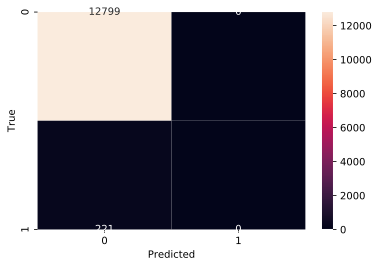

In [76]:
sns.heatmap(cm, annot=True, fmt='d');
plt.xlabel('Predicted')
plt.ylabel('True')

### Oversampling technique
Now, since we noticed the negative effect an imbalanced data can make, we have to tackle this problem and find a solution. fortunately, there are many techniques adujst the difference rate between the majority and minority classes. Most considerable one is the oversampling technique which uses the SMOTE function.
* SMOTE -> increase the size of the minority class and make equal instances from the majority class

In [78]:
!pip install -U imbalanced-learn

Requirement already up-to-date: imbalanced-learn in c:\users\manar\anaconda3\lib\site-packages (0.8.1)


Now , we will make a new oversampled version of the original data

In [249]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=0)
X,y=smote.fit_resample(X,y.ravel())

now, we will split the oversampled data into training and testing sets each with their features and targets

In [250]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X,y, test_size=0.3, random_state=0)

lets just confirm the new shapes and classes values

In [251]:
#now the target class's values are balanced 29832 non-stroke instances and 29832 stroke instances.
print (X_train_over.shape)
print (y_train_over.shape)
print (sum(y_train_over == 1))
print (sum(y_train_over == 0))

(59663, 17)
(59663,)
29691
29972


we can observe from the above that the imblanace data issue has been resolved since the different classes instances have slightly different total and that shouldn't influence any bias

### Target classes counts after oversampling

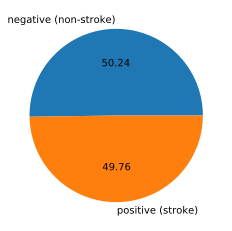

In [253]:
#sns.countplot(x='stroke', data=stroke_data);
plt.pie([29972,29691],labels=['negative (non-stroke)','positive (stroke)'],autopct='%.2f');

### Random Forest model 2

In [259]:
scaler = StandardScaler()
X_train_over = scaler.fit_transform(X_train_over)
X_test_over = scaler.transform(X_test_over)

In [260]:
#build the classifier
model_rf_os =  RandomForestClassifier()
model_rf_os.fit(X_train_over, y_train_over)
y_pred3 = model_rf_os.predict(X_test_over)

In [261]:
#score3= model.score(X_test,y_test)
precision3 = precision_score(y_test_over, y_pred3)
roc3 = roc_auc_score(y_test_over, y_pred3)
recall3 = recall_score(y_test_over, y_pred3)
#cm = confusion_matrix(y_test, y_pred)
accuracy3=accuracy_score(y_test_over,y_pred3)
data={'accuracy':accuracy3,'precesion':precision3,'recall':recall3}
matrics_df3=pd.DataFrame(data, index=[0])
matrics_df3

,accuracy,precesion,recall
0,0.988503,0.995217,0.981974


In [262]:
cm= confusion_matrix(y_test_over,y_pred3)
cm

array([[12584,    61],
       [  233, 12693]], dtype=int64)

Text(33.0, 0.5, 'True')

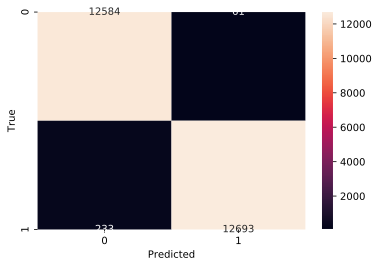

In [263]:
sns.heatmap(cm, annot=True, fmt='d');
plt.xlabel('Predicted')
plt.ylabel('True')

### Logestic regression model 2

In [264]:
#build the classifier
model_lr_os =  LogisticRegression()
model_lr_os.fit(X_train_over, y_train_over)
y_pred4 = model_lr_os.predict(X_test_over)

In [266]:
#score4= model.score(X_test,y_test)
precision4 = precision_score(y_test_over, y_pred4)
roc4 = roc_auc_score(y_test_over, y_pred4)
recall4 = recall_score(y_test_over, y_pred4)
#cm = confusion_matrix(y_test, y_pred)
accuracy4=accuracy_score(y_test_over,y_pred4)
data={'accuracy':accuracy4,'precesion':precision4,'recall':recall4}
matrics_df4=pd.DataFrame(data, index=[0])
matrics_df4

,accuracy,precesion,recall
0,0.940519,0.976598,0.903992


In [269]:
cm= confusion_matrix(y_test_over,y_pred4)
cm

array([[12365,   280],
       [ 1241, 11685]], dtype=int64)

Text(33.0, 0.5, 'True')

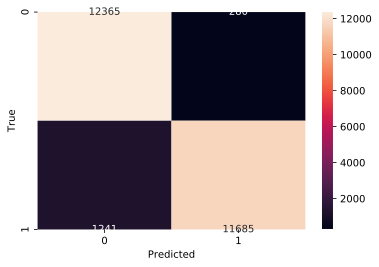

In [270]:
sns.heatmap(cm, annot=True, fmt='d');
plt.xlabel('Predicted')
plt.ylabel('True')

## Conclusion
We can observe the great effect the oversampling technique has made on the metrics' results after only adjusting the ratio of the data. It realiably classified stroke and non-stroke cases with a little rate of error and a relatively high accuracy, precsion and recall.

In [96]:
#if you can plot both metrics for both classifiers in both cases (before and after oversampling)